# Calculating pop growth and unemployment in California counties

 This python code calculates population growth and unemployment rates for California counties between 1970-2012. I downloaded data from the <a href="https://www.nhgis.org/">NHGIS</a>.

In [1]:
#this imports the pandas library
import pandas as pd

First, read the csv file and make sure the data got read in.

In [3]:
df = pd.read_csv("D:/documents copy/research/Practice/extract/nhgis/nhgis0098_csv/nhgis0098_ts_nominal_county.csv",encoding='latin1')
df.head()

,GISJOIN,STATE,STATEFP,STATENH,COUNTY,COUNTYFP,COUNTYNH,A00AA1790,A00AA1800,A00AA1810,...,B84AE1990,B84AE2000,B84AE125,B84AE125M,B84AF1970,B84AF1980,B84AF1990,B84AF2000,B84AF125,B84AF125M
0,G0100010,Alabama,1.0,10,Autauga County,1.0,10,NaN,NaN,NaN,...,878.0,1006.0,2262.0,344.0,6655.0,9042.0,8570.0,11323.0,14693.0,619.0
1,G0100015,Alabama,1.0,10,Baker County,NaN,15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,G0100030,Alabama,1.0,10,Baldwin County,3.0,30,NaN,NaN,NaN,...,2475.0,2813.0,7513.0,806.0,18351.0,25236.0,30237.0,44295.0,57160.0,1163.0
3,G0100050,Alabama,1.0,10,Barbour County,5.0,50,NaN,NaN,NaN,...,838.0,612.0,1436.0,254.0,7004.0,8376.0,7639.0,11720.0,11539.0,509.0
4,G0100055,Alabama,1.0,10,Benton County,NaN,55,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All NHGIS data comes with a data codebook. Based on codebook, I am going to.
* Calculate the percent of unemployment for years 1970, 1980, 1990, 2000, and 2008-2012.
* Calculate the population growth rate between 1970-1980, 1980-1990, 1990-2000, 2000-2010.

In [4]:
df['unemp_1970'] = df.apply(lambda row: 100*(row.B84AE1970 / row.B84AA1970), axis=1)
df['unemp_1980'] = df.apply(lambda row: 100*(row.B84AE1980 / row.B84AA1980), axis=1)
df['unemp_1990'] = df.apply(lambda row: 100*(row.B84AE1990 / row.B84AA1990), axis=1)
df['unemp_2000'] = df.apply(lambda row: 100*(row.B84AE2000 / row.B84AA2000), axis=1)
df['unemp_2012'] = df.apply(lambda row: 100*(row.B84AE125 / row.B84AA125), axis=1)

df['pop_growth_1970_1980'] = df.apply(lambda row: 100*(row.A00AA1980 - row.A00AA1970)/row.A00AA1970, axis=1)
df['pop_growth_1980_1990'] = df.apply(lambda row: 100*(row.A00AA1990 - row.A00AA1980)/row.A00AA1980, axis=1)
df['pop_growth_1990_2000'] = df.apply(lambda row: 100*(row.A00AA2000 - row.A00AA1990)/row.A00AA1990, axis=1)
df['pop_growth_2000_2010'] = df.apply(lambda row: 100*(row.A00AA2010 - row.A00AA2000)/row.A00AA2000, axis=1)

Now, I am going to make a dataset of only the California counties.

In [5]:
df_ca = df[df["STATE"]=="California"]

## Making the table for data 1970-1980 for California counties

In [6]:
df_ca_7080 = df_ca[["COUNTY","pop_growth_1970_1980","unemp_1980"]]
df_ca_7080=df_ca_7080.sort_values("pop_growth_1970_1980",ascending=False)
df_ca_7080

,COUNTY,pop_growth_1970_1980,unemp_1980
277,Alpine County,126.652893,7.189542
302,Mono County,113.570717,6.324952
305,Nevada County,96.025962,9.529930
284,El Dorado County,95.770310,9.430714
293,Lake County,86.034377,10.118997
298,Mariposa County,84.671654,8.346972
278,Amador County,63.387192,10.785463
329,Trinity County,55.718976,17.584294
331,Tuolumne County,53.042537,12.478198
280,Calaveras County,52.447552,9.594318


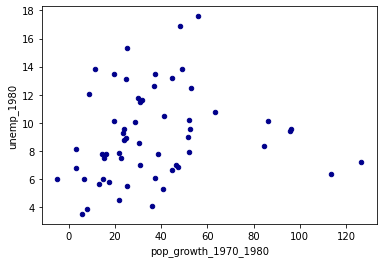

In [7]:
plot_1970_1980 = df_ca_7080.plot.scatter(x='pop_growth_1970_1980', y='unemp_1980', c='DarkBlue')

## Making the table for data 1980-1990 for California counties

In [8]:
df_ca_8090 = df_ca[["COUNTY","pop_growth_1980_1990","unemp_1990"]]
df_ca_8090=df_ca_8090.sort_values("pop_growth_1980_1990",ascending=False)
df_ca_8090

,COUNTY,pop_growth_1980_1990,unemp_1990
309,Riverside County,76.488692,6.917449
312,San Bernardino County,58.475379,7.396511
278,Amador County,55.529668,5.744172
280,Calaveras County,54.505070,6.956922
305,Nevada County,52.018588,6.094808
307,Placer County,47.377758,4.735277
284,El Dorado County,46.826784,5.396382
311,San Benito County,46.758648,8.679122
324,Solano County,44.734974,5.945278
331,Tuolumne County,42.820090,7.618498


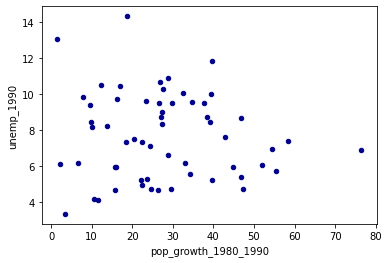

In [9]:
plot_1980_1990 = df_ca_8090.plot.scatter(x='pop_growth_1980_1990', y='unemp_1990', c='DarkBlue')

## Making the table for data 1990-2000 for California counties

In [10]:
df_ca_9000 = df_ca[["COUNTY","pop_growth_1990_2000","unemp_2000"]]
df_ca_9000=df_ca_9000.sort_values("pop_growth_1990_2000",ascending=False)
df_ca_9000

,COUNTY,pop_growth_1990_2000,unemp_2000
311,San Benito County,45.063629,6.628003
307,Placer County,43.752749,4.013724
296,Madera County,39.753661,13.220457
309,Riverside County,32.037751,7.502594
288,Imperial County,30.244367,12.552178
302,Mono County,29.098031,5.658436
291,Kings County,27.586751,12.653943
280,Calaveras County,26.739171,7.702818
284,El Dorado County,24.051748,5.386369
294,Lassen County,22.574100,9.406425


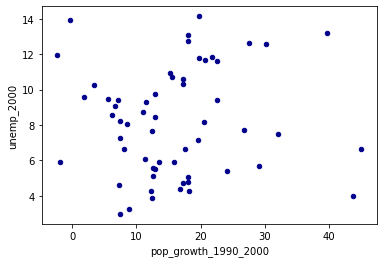

In [12]:
plot_1990_2000 = df_ca_9000.plot.scatter(x='pop_growth_1990_2000', y='unemp_2000', c='DarkBlue')

## Making the table for data 2000-2010 for California counties

In [13]:
df_ca_0010 = df_ca[["COUNTY","pop_growth_2000_2010","unemp_2012"]]
df_ca_0010=df_ca_0010.sort_values("pop_growth_2000_2010",ascending=False)
df_ca_0010

,COUNTY,pop_growth_2000_2010,unemp_2012
309,Riverside County,41.688846,14.144117
307,Placer County,40.271096,9.283383
290,Kern County,26.900528,13.021926
288,Imperial County,22.595374,17.865605
296,Madera County,22.545874,11.590689
315,San Joaquin County,21.594825,15.681072
300,Merced County,21.485700,16.103572
330,Tulare County,20.150481,14.034519
327,Sutter County,20.026606,14.628602
334,Yuba County,19.820987,17.045245


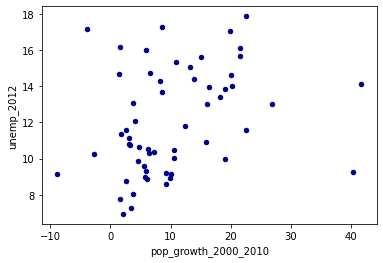

In [14]:
plot_2000_2010 = df_ca_0010.plot.scatter(x='pop_growth_2000_2010', y='unemp_2012', c='DarkBlue')